In [101]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
import os
os.chdir(r"C:\Users\N..C..C\Downloads\Documents")

In [21]:
sheet = pd.read_csv("StartUp.csv")
df = sheet.copy()
df.head()
df.info()
df.shape
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [22]:
corr = df.corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


C:\Users\N..C..C\AppData\Local\Temp\ipykernel_12124\92767312.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

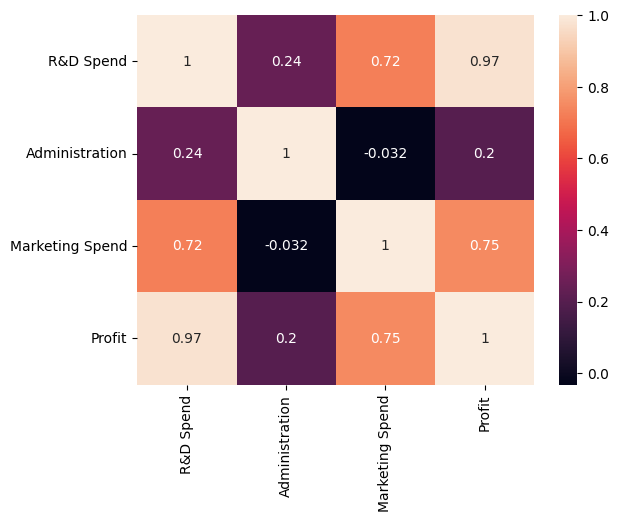

In [23]:
sb.heatmap(corr,annot=True)

<AxesSubplot: xlabel='R&D Spend', ylabel='Profit'>

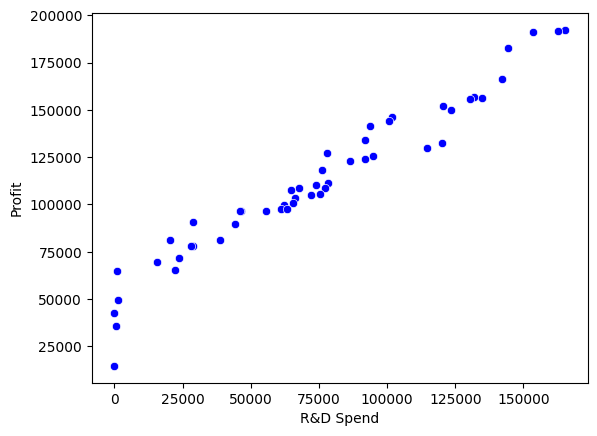

In [24]:
sb.scatterplot(x="R&D Spend", y="Profit", data=df, color="blue")

array([[<AxesSubplot: title={'center': 'R&D Spend'}>,
        <AxesSubplot: title={'center': 'Administration'}>],
       [<AxesSubplot: title={'center': 'Marketing Spend'}>,
        <AxesSubplot: title={'center': 'Profit'}>]], dtype=object)

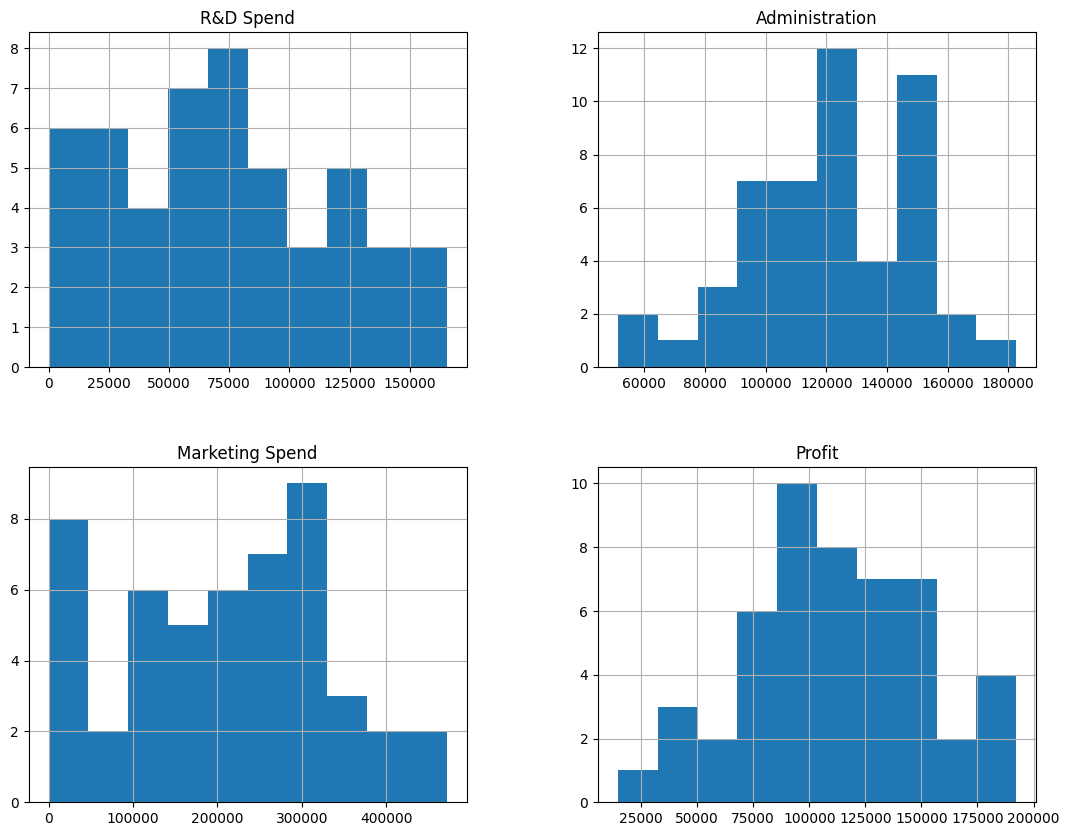

In [25]:
df.hist(figsize=(13,10))

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [27]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [42]:
df_State = pd.get_dummies(df["State"])
print(df_State)

    California  Florida  New York
0            0        0         1
1            1        0         0
2            0        1         0
3            0        0         1
4            0        1         0
5            0        0         1
6            1        0         0
7            0        1         0
8            0        0         1
9            1        0         0
10           0        1         0
11           1        0         0
12           0        1         0
13           1        0         0
14           0        1         0
15           0        0         1
16           1        0         0
17           0        0         1
18           0        1         0
19           0        0         1
20           1        0         0
21           0        0         1
22           0        1         0
23           0        1         0
24           0        0         1
25           1        0         0
26           0        1         0
27           0        0         1
28           0

In [43]:
dfDummies = pd.get_dummies(df["State"], prefix="State")
print(dummies)

    State_California  State_Florida  State_New York
0                  0              0               1
1                  1              0               0
2                  0              1               0
3                  0              0               1
4                  0              1               0
5                  0              0               1
6                  1              0               0
7                  0              1               0
8                  0              0               1
9                  1              0               0
10                 0              1               0
11                 1              0               0
12                 0              1               0
13                 1              0               0
14                 0              1               0
15                 0              0               1
16                 1              0               0
17                 0              0               1
18          

In [47]:
df = pd.concat([df,dummies],axis=1) # axis stands for colmus - rows --> 1 to cols, 0 to rows

In [48]:
df = df.drop(["State_Florida"],axis=1) # we can also delete the colum with dropfirst in dummies 

In [49]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,State_California,State_New York,State_California,State_New York,State_California,State_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1,0,1,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,1,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,0,0,0,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1,0,1,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,0,0,0,0


In [50]:
df = df.drop(["State"],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_New York,State_California,State_New York,State_California,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1,0,1,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,1,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,0,0,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1,0,1,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0,0,0,0,0


In [51]:
x = df.drop("Profit",axis=1)
y = df["Profit"]

In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=35)

In [69]:
print(xTrain)

    R&D Spend  Administration  Marketing Spend  State_California  \
48     542.05        51743.15             0.00                 0   
34   46426.07       157693.92        210797.67                 1   
2   153441.51       101145.55        407934.54                 0   
20   76253.86       113867.30        298664.47                 1   
37   44069.95        51283.14        197029.42                 1   
10  101913.08       110594.11        229160.95                 0   
1   162597.70       151377.59        443898.53                 1   
36   28663.76       127056.21        201126.82                 0   
16   78013.11       121597.55        264346.06                 1   
6   134615.46       147198.87        127716.82                 1   
28   66051.52       182645.56        118148.20                 0   
5   131876.90        99814.71        362861.36                 0   
7   130298.13       145530.06        323876.68                 0   
24   77044.01        99281.34        140574.81  

In [70]:
print(xTest)

    R&D Spend  Administration  Marketing Spend  State_California  \
39   38558.51        82982.09        174999.30                 1   
26   75328.87       144135.98        134050.07                 0   
22   73994.56       122782.75        303319.26                 0   
31   61136.38       152701.92         88218.23                 0   
29   65605.48       153032.06        107138.38                 0   
43   15505.73       127382.30         35534.17                 0   
41   27892.92        84710.77        164470.71                 0   
17   94657.16       145077.58        282574.31                 0   
25   64664.71       139553.16        137962.62                 1   
23   67532.53       105751.03        304768.73                 0   
35   46014.02        85047.44        205517.64                 0   
4   142107.34        91391.77        366168.42                 0   
18   91749.16       114175.79        294919.57                 0   
32   63408.86       129219.61         46085.25  

In [71]:
print(yTest)

39     81005.76
26    105733.54
22    110352.25
31     97483.56
29    101004.64
43     69758.98
41     77798.83
17    125370.37
25    107404.34
23    108733.99
35     96479.51
4     166187.94
18    124266.90
32     97427.84
14    132602.65
Name: Profit, dtype: float64


In [72]:
print(yTrain)

48     35673.41
34     96712.80
2     191050.39
20    118474.03
37     89949.14
10    146121.95
1     191792.06
36     90708.19
16    126992.93
6     156122.51
28    103282.38
5     156991.12
7     155752.60
24    108552.04
38     81229.06
13    134307.35
49     14681.40
46     49490.75
19    122776.86
3     182901.99
21    111313.02
12    141585.52
45     64926.08
27    105008.31
30     99937.59
8     152211.77
42     71498.49
11    144259.40
40     78239.91
0     192261.83
47     42559.73
33     96778.92
44     65200.33
15    129917.04
9     149759.96
Name: Profit, dtype: float64


In [73]:
Regression = LinearRegression()
model = Regression.fit(xTrain, yTrain)
y_pred = Regression.predict(xTest)
print(y_pred)

[ 82650.9117116  114969.39758638 118676.50929817  96544.92731081
 100747.9090714   57717.3968126   77491.15050383 129634.19513011
 102260.23338696 113685.4346295   88383.71117144 177651.4908451
 133416.99793516  99051.42621287 155021.60473205]


In [74]:
df = pd.DataFrame({"yTest" : yTest, "y_pred" : y_pred, "Error perv" : abs(y_pred-yTest)})
print(df)

        yTest         y_pred    Error perv
39   81005.76   82650.911712   1645.151712
26  105733.54  114969.397586   9235.857586
22  110352.25  118676.509298   8324.259298
31   97483.56   96544.927311    938.632689
29  101004.64  100747.909071    256.730929
43   69758.98   57717.396813  12041.583187
41   77798.83   77491.150504    307.679496
17  125370.37  129634.195130   4263.825130
25  107404.34  102260.233387   5144.106613
23  108733.99  113685.434629   4951.444629
35   96479.51   88383.711171   8095.798829
4   166187.94  177651.490845  11463.550845
18  124266.90  133416.997935   9150.097935
32   97427.84   99051.426213   1623.586213
14  132602.65  155021.604732  22418.954732


In [75]:
mse = mean_absolute_error(yTest, y_pred)
print(mse)

6657.417321593644


In [78]:
square = np.sqrt(mse)
print(square)
model.score(xTrain,yTrain)

81.59299799366147


0.956142267350216

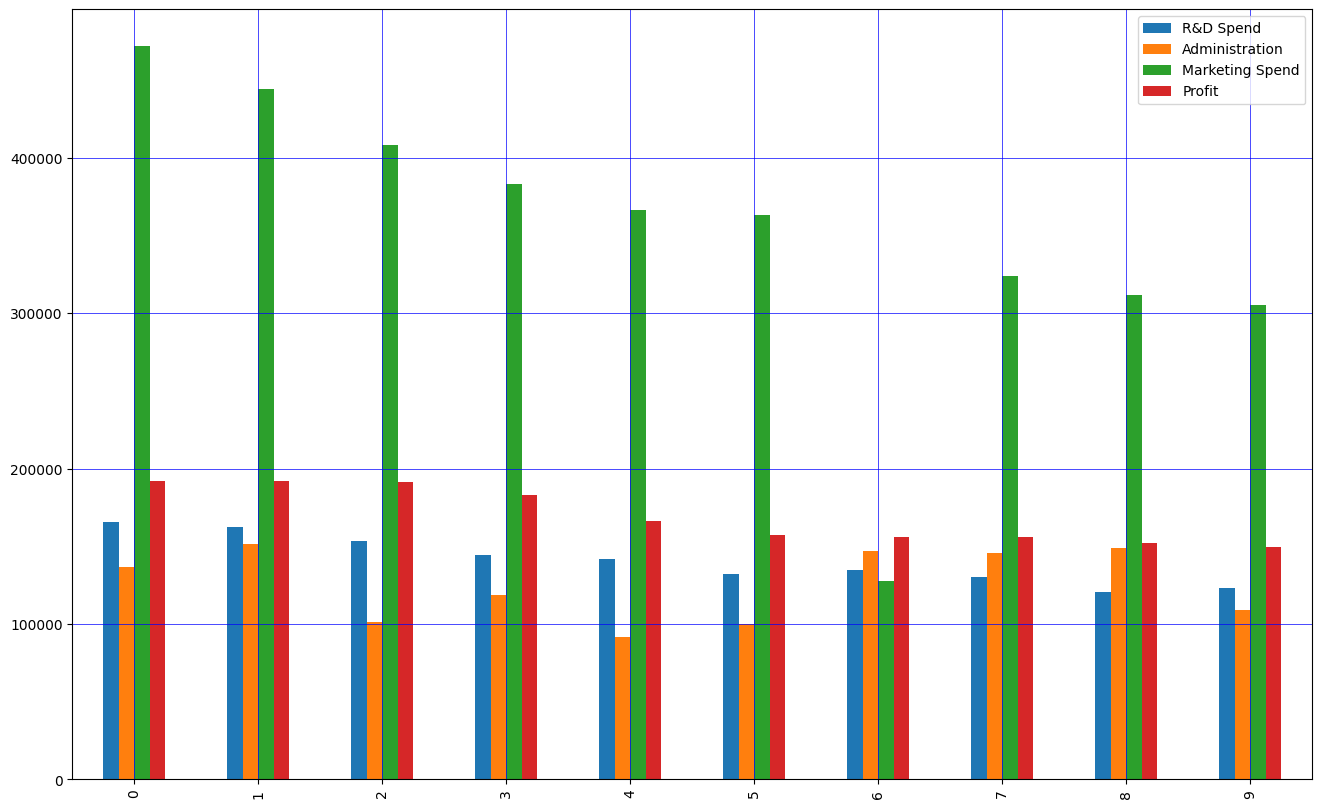

In [85]:
df1 = sheet.head(10)
df1.plot(kind="bar", figsize=(16,10))
plt.grid(which="major",linestyle="-", linewidth="0.5",color="blue")

In [88]:
print("Intercept of the model = ",Regression.intercept_)
print("Coefficient of the line = ",Regression.coef_)

Intercept of the model =  51762.58288902044
Coefficient of the line =  [ 8.32481595e-01 -2.06061407e-02  2.58634933e-02 -1.34235790e+03
 -1.74920037e+03 -1.34235790e+03 -1.74920037e+03 -1.34235790e+03
 -1.74920037e+03]


In [92]:
stmodel=sm.OLS(y,x).fit()
stmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              765.9
Date:                Mon, 06 Feb 2023   Prob (F-statistic):                    2.49e-42
Time:                        18:48:38   Log-Likelihood:                         -543.87
No. Observations:                  50   AIC:                                      1098.
Df Residuals:                      45   BIC:                                      1107.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7217      0.064     11.260      0.000       0.593       0.851
Administration       0.2847      0.038      7.465      0.000       0.208       0.362
Marketing Spend      0.0830      0.022      3.833      0.000       0.039       0.127
State_California  2573.4903   1513.100      1.701      0.096    -474.049    5621.029
State_New York    2375.5639   1510.049      1.573      0.123    -665.830    5416.958
State_California  2573.4903   1513.100      1.701      0.096    -474.049    5621.029
State_New York    2375.5639   1510.049      1.573      0.123    -665.830    5416.958
State_California  2573.4903   1513.100      1.701      0.096    -474.049    5621.029
State_New York    2375.5639   1510.049      1.573      0.123    -665.830    5416.958
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   1.480
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.929
Skew:                          -0.212   Prob(JB):                        0.628
Kurtosis:                       2.484   Cond. No.                     2.17e+22
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 8.26e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           1.34e-27
Time:                        18:48:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California   -66.2629   1123.669     -0.059      0.953   -2330.869    2198.343
State_New York     -80.2253   1112.952     -0.072      0.943   -2323.234    2162.783
State_California   -66.2629   1123.669     -0.059      0.953   -2330.869    2198.343
State_New York     -80.2253   1112.952     -0.072      0.943   -2323.234    2162.783
State_California   -66.2629   1123.669     -0.059      0.953   -2330.869    2198.343
State_New York     -80.2253   1112.952     -0.072      0.943   -2323.234    2162.783
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.97e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [95]:
x=x.drop(["State_California"],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           8.50e-29
Time:                        18:49:16   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
R&D Spend           0.8059      0.046     17.571      0.000       0.714       0.898
Administration     -0.0269      0.052     -0.521      0.605      -0.131       0.077
Marketing Spend     0.0271      0.017      1.625      0.111      -0.007       0.061
State_New York    -45.5014    933.906     -0.049      0.961   -1926.485    1835.482
State_New York    -45.5014    933.906     -0.049      0.961   -1926.485    1835.482
State_New York    -45.5014    933.906     -0.049      0.961   -1926.485    1835.482
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.47e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [96]:
x=x.drop(["State_New York"],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        18:49:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
x=x.drop(["Administration"],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           2.16e-31
Time:                        18:49:39   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
x=x.drop(["Marketing Spend"],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.50e-32
Time:                        18:49:51   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
data = [[0,61],[0,62],[1,63],[1,64]]
s = StandardScaler()
s.fit_transform(data)

array([[-1.        , -1.34164079],
       [-1.        , -0.4472136 ],
       [ 1.        ,  0.4472136 ],
       [ 1.        ,  1.34164079]])

In [105]:
data = [[0,61],[0,62],[1,63],[1,64]]
s = MinMaxScaler()
s.fit_transform(data)

array([[0.        , 0.        ],
       [0.        , 0.33333333],
       [1.        , 0.66666667],
       [1.        , 1.        ]])

In [106]:
data = [[0,61],[0,62],[1,63],[1,64]]
s = RobustScaler()
s.fit_transform(data)

array([[-0.5       , -1.        ],
       [-0.5       , -0.33333333],
       [ 0.5       ,  0.33333333],
       [ 0.5       ,  1.        ]])

In [107]:
data = [[0,61],[0,62],[1,63],[1,64]]
s = Normalizer()
s.fit_transform(data)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.01587102, 0.99987405],
       [0.01562309, 0.99987795]])